In [1]:
#check the distribution shapes of samples in three regions

In [1]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import astropy.io.fits as fits
from astropy.table import Table
import sys
sys.path.append('.')
from source import source

Populating the interactive namespace from numpy and matplotlib


In [20]:
# Libraries
from scipy.stats import kde
 
def plot_maker(x_col,y_col,x_label=None,y_label=None,y_lim=None,x_lim=None,color='red'):
    import numpy as n
    x, y = x_col,y_col
    nbins = 30
    # Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
    k = kde.gaussian_kde(np.array([x,y]))
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
    # contour
    import matplotlib.colors as mcolors
    if x_label is not None:
        plt.xlabel(x_label)
        plt.ylabel(y_label)
    if y_lim is not None:
        plt.gca().set_ylim(y_lim)
    if x_lim is not None:
        plt.gca().set_xlim(x_lim)
    if color=='red':
        colors = [(1,0,0,i) for i in np.linspace(0.2,1,9)]
        colors[0] = (0, 0, 1, 0.0)
    if color=='blue':
        colors = [(0,0,1,i) for i in np.linspace(0.2,1,9)]
        colors[0] = (0, 0, 1, 0.0)
    if color=='yellow':
        colors = [(0,1,0,i) for i in np.linspace(0.2,1,9)]
        colors[0] = (0, 1, 0, 0.0)

    plt.contourf(xi, yi, zi.reshape(xi.shape),8,colors=colors)


In [3]:
dat = fits.getdata('/global/cscratch1/sd/ajross/tarcat/vtest/tv0.50.0/LRG_IRsv1targetsDR9v0.50.0_masked.fits')
#random = fits.getdata('/global/cscratch1/sd/ajross/tarcat/vtest/tv0.49.0/randomsDR9v0.49.0_0_masked.fits')
random=dat

In [4]:
DS = source('LRG','DS')

In [5]:
DN = source('LRG','DN')

In [6]:
BM = source('LRG','BassMzls')

In [7]:
from tools import *
gmag_dn=flux2mag(DN.data['FLUX_G'],DN.data['MW_TRANSMISSION_G'])
rmag_dn=flux2mag(DN.data['FLUX_R'],DN.data['MW_TRANSMISSION_R'])
zmag_dn=flux2mag(DN.data['FLUX_Z'],DN.data['MW_TRANSMISSION_Z'])

#plot_maker(DN.data['FLUX_G']/DN.data['MW_TRANSMISSION_G'],DN.data['FLUX_R']/DN.data['MW_TRANSMISSION_R'])
sel_dn = (gmag_dn>-1000)&(gmag_dn<1000)&(rmag_dn>-1000)&(rmag_dn<1000)&(zmag_dn>-1000)&(zmag_dn<1000)

/global/cscratch1/sd/huikong/Obiwan/dr9_LRG/notebooks/tools.py:8: RuntimeWarning: divide by zero encountered in log10
  mag= 22.5 - 2.5 * np.log10(flux / mwtransmission)
/global/cscratch1/sd/huikong/Obiwan/dr9_LRG/notebooks/tools.py:8: RuntimeWarning: invalid value encountered in log10
  mag= 22.5 - 2.5 * np.log10(flux / mwtransmission)
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in greater
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in less


Text(0.5,1,'Decals North')

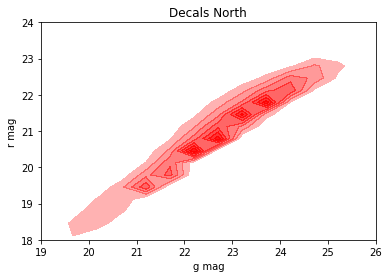

In [10]:
plot_maker(gmag_dn[sel_dn][::20],rmag_dn[sel_dn][::20],x_lim=(19,26),y_lim=(18,24))
plt.xlabel('g mag')
plt.ylabel('r mag')
plt.title('Decals North')

In [18]:
gmag_ds=flux2mag(DS.data['FLUX_G'],DS.data['MW_TRANSMISSION_G'])
rmag_ds=flux2mag(DS.data['FLUX_R'],DS.data['MW_TRANSMISSION_R'])
zmag_ds=flux2mag(DS.data['FLUX_Z'],DS.data['MW_TRANSMISSION_Z'])
sel_ds = (gmag_ds>-1000)&(gmag_ds<1000)&(rmag_ds>-1000)&(rmag_ds<1000)&(zmag_ds>-1000)&(zmag_ds<1000)

/global/cscratch1/sd/huikong/Obiwan/dr9_LRG/notebooks/tools.py:8: RuntimeWarning: divide by zero encountered in log10
  mag= 22.5 - 2.5 * np.log10(flux / mwtransmission)
/global/cscratch1/sd/huikong/Obiwan/dr9_LRG/notebooks/tools.py:8: RuntimeWarning: invalid value encountered in log10
  mag= 22.5 - 2.5 * np.log10(flux / mwtransmission)
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in greater
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in less


Text(0.5,1,'Decals South')

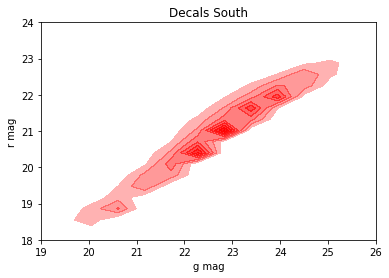

In [19]:
plot_maker(gmag_ds[sel_ds][::20],rmag_ds[sel_ds][::20],x_lim=(19,26),y_lim=(18,24))
plt.xlabel('g mag')
plt.ylabel('r mag')
plt.title('Decals South')

In [16]:
gmag_bm=flux2mag(BM.data['FLUX_G'],BM.data['MW_TRANSMISSION_G'])
rmag_bm=flux2mag(BM.data['FLUX_R'],BM.data['MW_TRANSMISSION_R'])
zmag_bm=flux2mag(BM.data['FLUX_Z'],BM.data['MW_TRANSMISSION_Z'])
sel_bm = (gmag_bm>-1000)&(gmag_bm<1000)&(rmag_bm>-1000)&(rmag_bm<1000)&(zmag_bm>-1000)&(zmag_bm<1000)

/global/cscratch1/sd/huikong/Obiwan/dr9_LRG/notebooks/tools.py:8: RuntimeWarning: divide by zero encountered in log10
  mag= 22.5 - 2.5 * np.log10(flux / mwtransmission)
/global/cscratch1/sd/huikong/Obiwan/dr9_LRG/notebooks/tools.py:8: RuntimeWarning: invalid value encountered in log10
  mag= 22.5 - 2.5 * np.log10(flux / mwtransmission)
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in greater
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in less


Text(0.5,1,'Bass/Mzls')

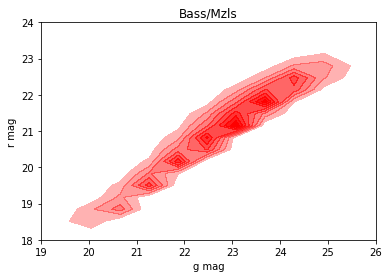

In [17]:
plot_maker(gmag_bm[sel_bm][::20],rmag_bm[sel_bm][::20],x_lim=(19,26),y_lim=(18,24))
plt.xlabel('g mag')
plt.ylabel('r mag')
plt.title('Bass/Mzls')

Text(0,0.5,'r mag')

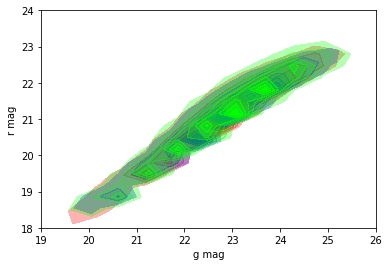

In [26]:
plot_maker(gmag_dn[sel_dn][::20],rmag_dn[sel_dn][::20],x_lim=(19,26),y_lim=(18,24),color='red')
plot_maker(gmag_ds[sel_ds][::20],rmag_ds[sel_ds][::20],x_lim=(19,26),y_lim=(18,24),color='blue')
plot_maker(gmag_bm[sel_bm][::20],rmag_bm[sel_bm][::20],x_lim=(19,26),y_lim=(18,24),color='yellow')
plt.xlabel('g mag')
plt.ylabel('r mag')

In [ ]:
plot_maker(gmag_dn[sel_dn][::20],zmag_dn[sel_dn][::20],x_lim=(19,26),y_lim=(16,22),color='red')
plot_maker(gmag_ds[sel_ds][::20],zmag_ds[sel_ds][::20],x_lim=(19,26),y_lim=(16,22),color='blue')
plot_maker(gmag_bm[sel_bm][::20],zmag_bm[sel_bm][::20],x_lim=(19,26),y_lim=(16,22),color='yellow')
plt.xlabel('g mag')
plt.ylabel('z mag')

In [ ]:
plot_maker(rmag_dn[sel_dn][::20],zmag_dn[sel_dn][::20],x_lim=(18,24),y_lim=(17,22),color='red')
plot_maker(rmag_ds[sel_ds][::20],zmag_ds[sel_ds][::20],x_lim=(18,24),y_lim=(17,22),color='blue')
plot_maker(rmag_bm[sel_bm][::20],zmag_bm[sel_bm][::20],x_lim=(18,24),y_lim=(17,22),color='yellow')
plt.xlabel('r mag')
plt.ylabel('z mag')